# Ricardo Talavera Data Scientist
## Caso: Implementación de modelos de clasificación lineales

### Nuestro Proposito

En esta actividad pondremos en práctica, con un conjunto de datos reales, la implementación de modelos lineales para poder hallar los elementos que nos permitan escoger aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementaremos modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

### Datos

En esta ocasión usaremos una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-smarket

### 1. Análisis preliminar de variables 

In [85]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
import pandas as pd
data=pd.read_csv("dataset-18213.csv")
print(data.info())
print(data.size)
print(data.isna().sum(axis=0))
print(data.head(3))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB
None
11250
Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64
   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381

In [86]:
data["Direction"].value_counts() #Balanceadas

Up      648
Down    602
Name: Direction, dtype: int64

Desfasaremos el volumen para obtener vol_lag1 es decir el volumen del día anterior al día de la predicción. Por otro lado trabajar con la variable "today" no tiene sentido, pues no se debe conocer dato alguno del día de la predicción.

In [87]:
from sklearn.preprocessing import OrdinalEncoder
ord= OrdinalEncoder(categories=[["Down","Up"]])
data["Direction2"]=ord.fit_transform(data[["Direction"]])
data.drop(["Direction"],axis =1, inplace=True)
data.drop(["Today"],axis =1, inplace=True)


In [88]:
vol_lag1=[val for i,val in enumerate(data["Volume"]) if i<data.shape[0]-1]
data.drop([0],axis =0, inplace=True)

In [89]:
data.drop(["Volume"],axis =1, inplace=True)

In [90]:
data["Volume"]=vol_lag1

In [91]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Direction2,Volume
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.0,1.1913
2,2001,1.032,0.959,0.381,-0.192,-2.624,0.0,1.2965
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.0,1.4112
4,2001,0.614,-0.623,1.032,0.959,0.381,1.0,1.2760
5,2001,0.213,0.614,-0.623,1.032,0.959,1.0,1.2057


In [92]:
data.shape

(1249, 8)

In [93]:
data.Year.value_counts().sort_values()

2001    241
2002    252
2003    252
2004    252
2005    252
Name: Year, dtype: int64

In [94]:
import numpy as np
X=data.copy()
media_year=np.mean(X["Year"])
var_year=np.var(X["Year"])
sd_year= var_year**0.5
X["Year"]=(X["Year"]-media_year)/sd_year

In [95]:
X.head(3)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Direction2,Volume
1,-1.433105,0.959,0.381,-0.192,-2.624,-1.055,1.0,1.1913
2,-1.433105,1.032,0.959,0.381,-0.192,-2.624,0.0,1.2965
3,-1.433105,-0.623,1.032,0.959,0.381,-0.192,1.0,1.4112


<AxesSubplot: >

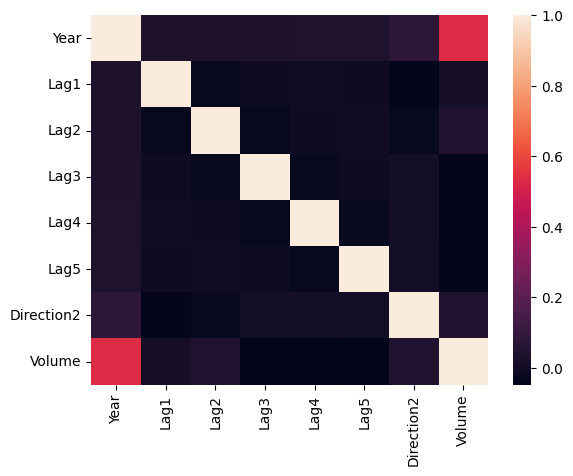

In [96]:
import seaborn as sns
corr=X.corr()
sns.heatmap(corr)

"Volumen con retraso" y "Year" presentan cierta correlación, obviaremos el volumen y consideraremos el año. Recordemos los conceptos : La variable a predecir es de naturaleza cualitativa, razón por la cual esta matriz de correlaciones de Pearson **no aplica** entre la variable a predecir y la predictora. Solo nos interesa explorar si hay correlación entre las variables numéricas que son las variables predictoras.

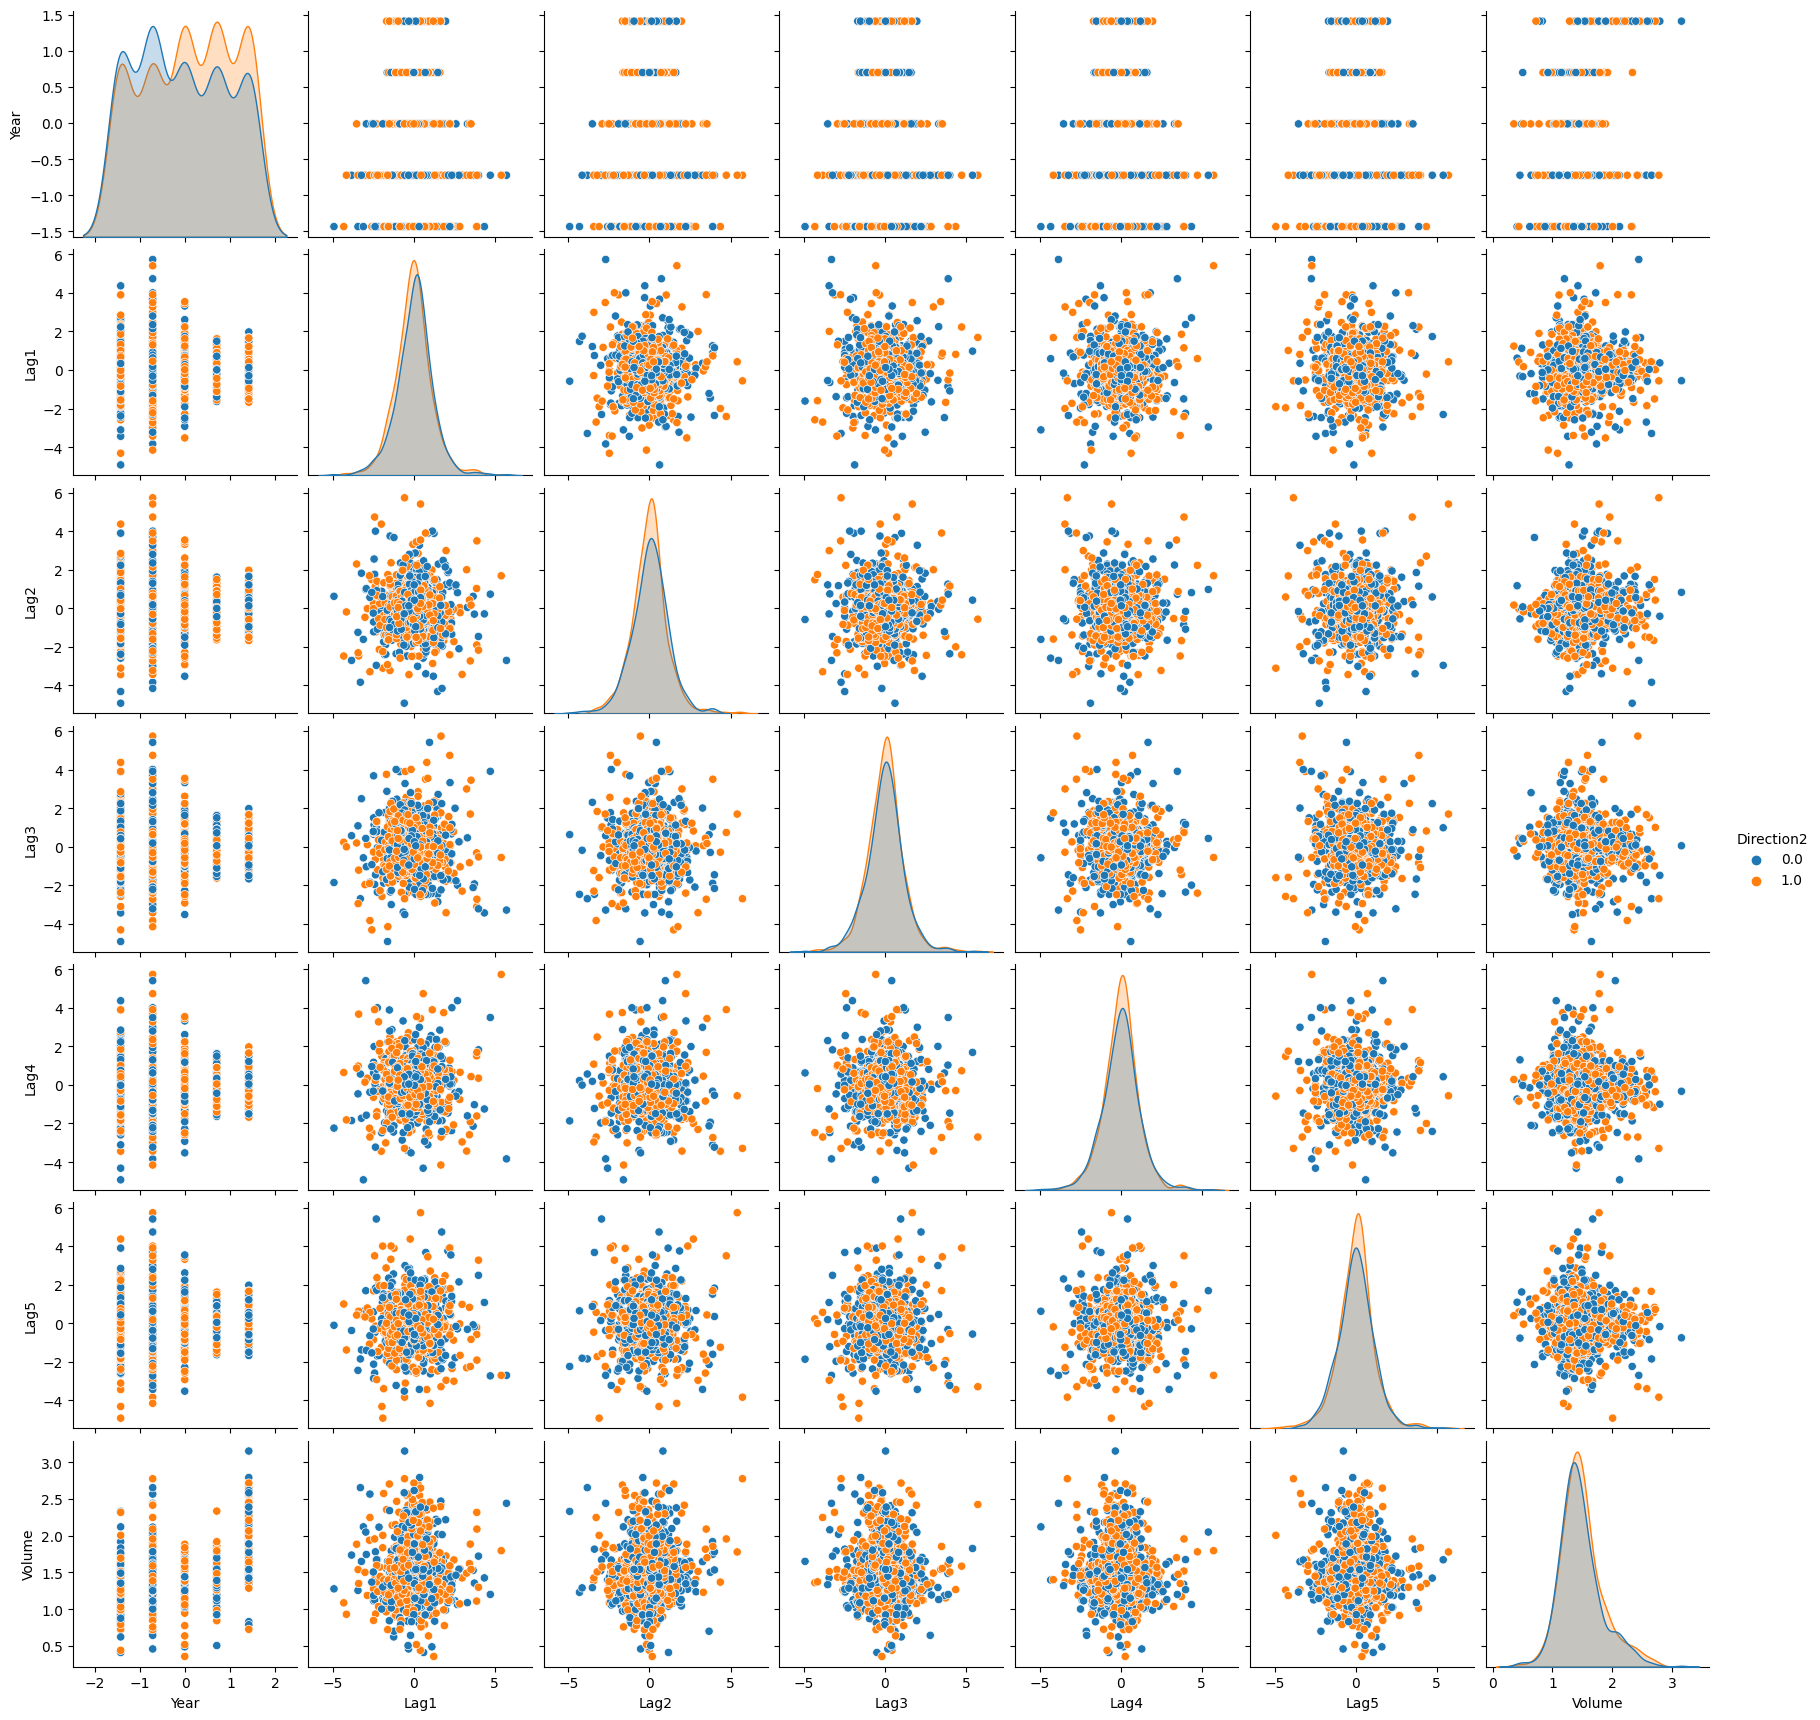

In [97]:
sns.pairplot(X, hue="Direction2")

In [98]:
Y= X["Direction2"] #Lo vuelve una serie
X.drop(["Direction2"],axis=1,inplace=True) #sigue siendo dataframe
X.drop(["Volume"],axis=1,inplace=True) #sigue siendo dataframe

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

In [100]:
data.head(2)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Direction2,Volume
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.0,1.1913
2,2001,1.032,0.959,0.381,-0.192,-2.624,0.0,1.2965


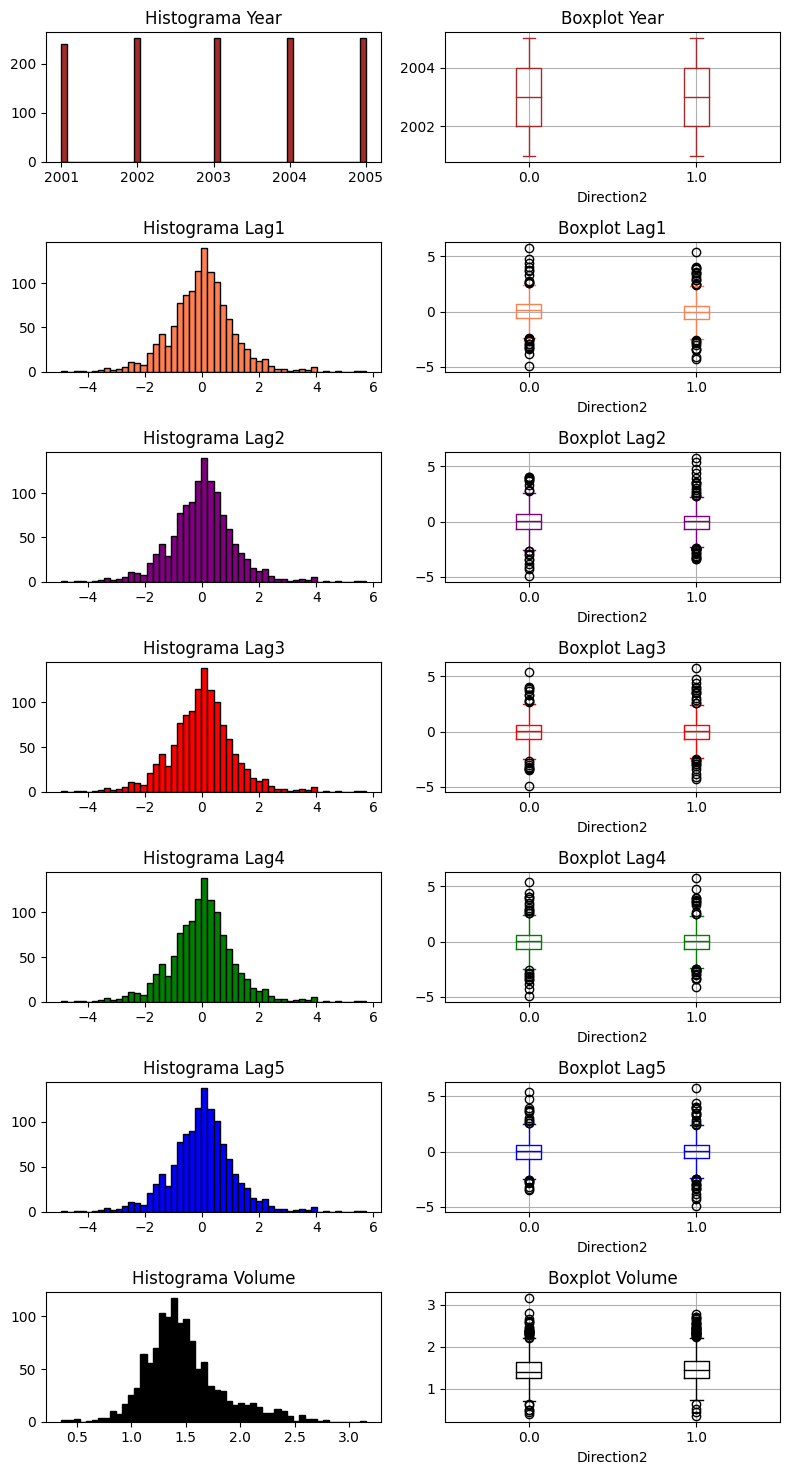

In [101]:
import matplotlib.pyplot as plt

colores=["brown","coral","purple","red","green","blue","black"]

fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(8,15))

for i,col in enumerate([cols for cols in data.columns if cols != "Direction2"]):

    ax[i,0].hist(data[col],color=colores[i],ec="black",bins=50)
    ax[i,0].set_title(f"Histograma {col}")

    data.boxplot(column=col, by="Direction2",ax=ax[i,1],color = colores[i])
    ax[i,1].set_title(f"Boxplot {col}")

fig.suptitle("")
plt.tight_layout()

### 2. Estimación modelo LDA

Recall : = 0.648
Accuracy : = 0.544


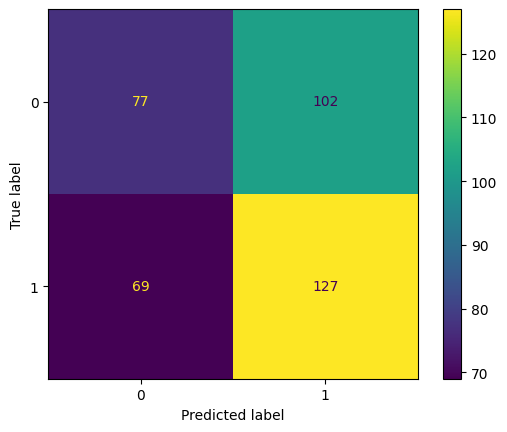

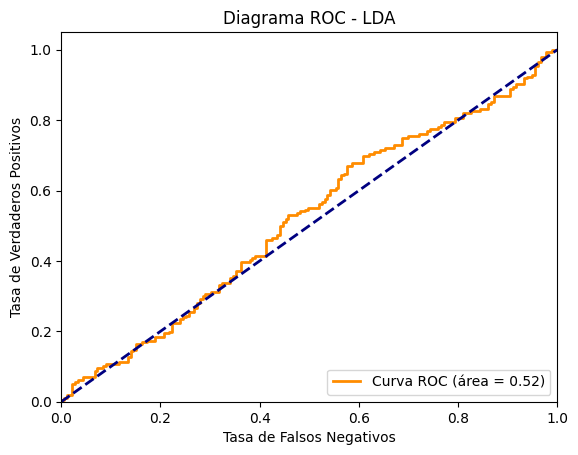

In [102]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

lda.fit(x_train,y_train)
y_pred_lda= lda.predict(x_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,accuracy_score,roc_curve,auc

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_lda,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_lda),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_lda),4))
cfd.plot()
plt.show()

#|||||||||||||||||||||||||||||||||||||||||||||||||||

y_score = lda.decision_function(x_test)

fpr,tpr,punto_corte = roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)

plt.figure()

plt.plot(fpr,tpr, color = "darkorange", lw=2, label="Curva ROC (área = %0.2f)" % roc_auc)

plt.plot([0,1], [0,1], color = "navy", lw=2, linestyle= "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Tasa de Falsos Negativos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Diagrama ROC - LDA")
plt.legend(loc="lower right")
plt.show()


Mejores hiperparametros  {'shrinkage': 0.5435435435435435, 'solver': 'lsqr'}
Recall : = 0.6582
Accuracy : = 0.5387


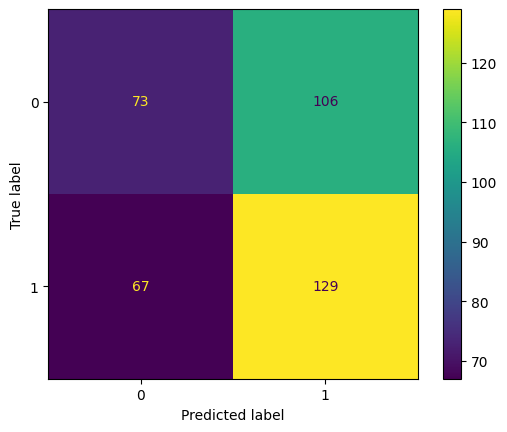

In [103]:
#LDA con mejora de hiperparametros con grilla
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

shrinkage_range = np.linspace(0,1,1000)
solver_options = ["svd","lsqr","eigen"]

lda_grid=LinearDiscriminantAnalysis()

param_grid= dict(solver=solver_options, shrinkage=shrinkage_range)

grid_lda = GridSearchCV(lda_grid,param_grid,cv=5)

grid_lda.fit(x_train,y_train)

print("Mejores hiperparametros ", grid_lda.best_params_)

y_pred_grid_lda=grid_lda.predict(x_test)

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_grid_lda,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_grid_lda),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_grid_lda),4))
cfd.plot()
plt.show()

### 3. Estimación modelo QDA 

Recall : = 0.648
Accuracy : = 0.5333


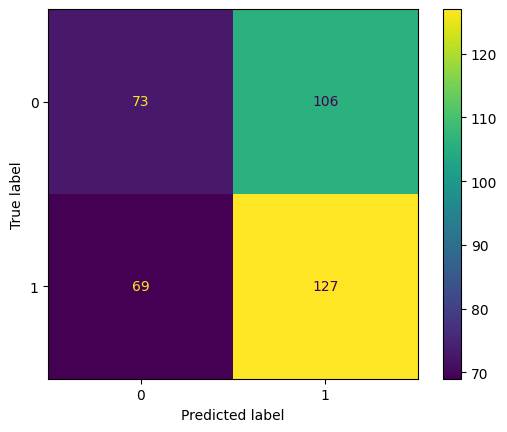

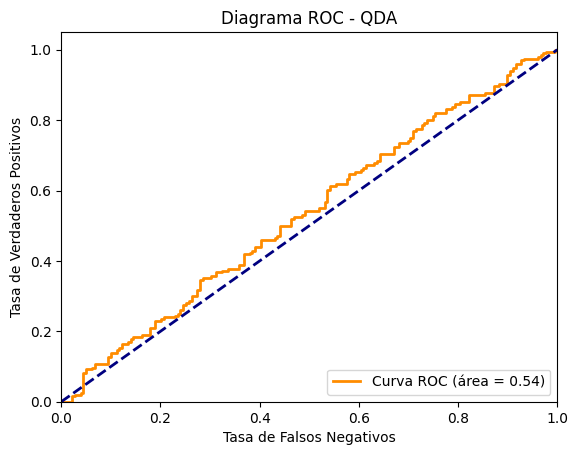

In [104]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()

qda.fit(x_train,y_train)
y_pred_qda= qda.predict(x_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,accuracy_score,roc_curve,auc

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_qda,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_qda),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_qda),4))
cfd.plot()
plt.show()

#|||||||||||||||||||||||||||||||||||||||||||||||||||

y_score = qda.decision_function(x_test)

fpr,tpr,punto_corte = roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)

plt.figure()

plt.plot(fpr,tpr, color = "darkorange", lw=2, label="Curva ROC (área = %0.2f)" % roc_auc)

plt.plot([0,1], [0,1], color = "navy", lw=2, linestyle= "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Tasa de Falsos Negativos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Diagrama ROC - QDA")
plt.legend(loc="lower right")
plt.show()




Mejores hiperparametros  {'reg_param': 1.2618568830660184}
Recall : = 0.6429
Accuracy : = 0.512


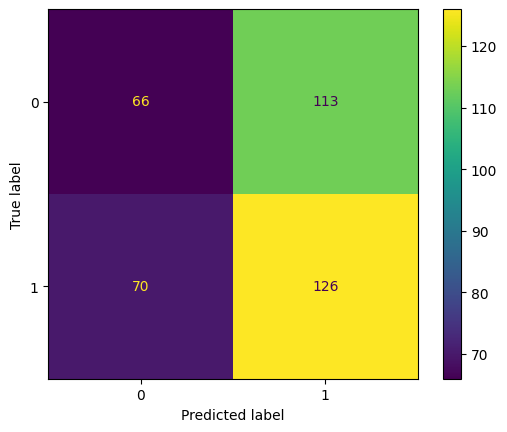

In [105]:
#QDA con mejora de hiperparametros con grilla
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

rparam_range = np.logspace(-10,10,100)

qda_grid=QuadraticDiscriminantAnalysis()

param_grid= dict(reg_param=rparam_range)

grid_qda = GridSearchCV(qda_grid,param_grid,cv=5)

grid_qda.fit(x_train,y_train)

print("Mejores hiperparametros ", grid_qda.best_params_)

y_pred_grid_qda=grid_qda.predict(x_test)

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_grid_qda,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_grid_qda),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_grid_qda),4))
cfd.plot()
plt.show()

### 4. Estimación modelo NBC 

Recall : = 0.6173
Accuracy : = 0.528


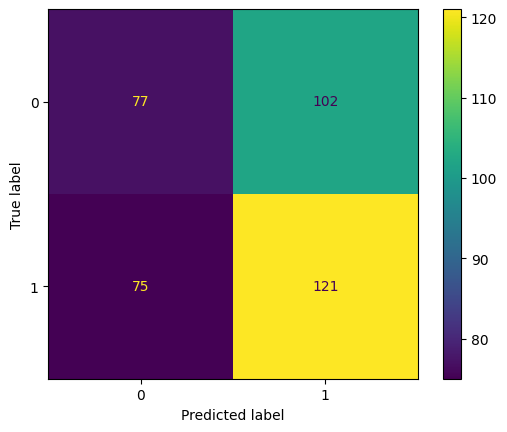

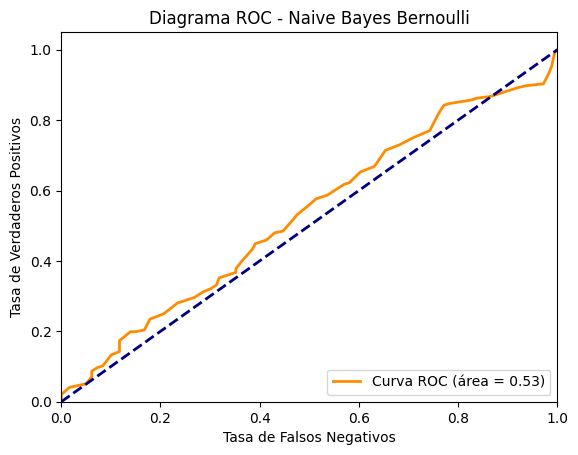

In [106]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()

nb.fit(x_train,y_train)
y_pred_nb= nb.predict(x_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,accuracy_score,roc_curve,auc

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_nb,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_nb),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_nb),4))
cfd.plot()
plt.show()

#|||||||||||||||||||||||||||||||||||||||||||||||||||

y_score = nb.predict_proba(x_test)[:,1]

fpr,tpr,punto_corte = roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)

plt.figure()

plt.plot(fpr,tpr, color = "darkorange", lw=2, label="Curva ROC (área = %0.2f)" % roc_auc)

plt.plot([0,1], [0,1], color = "navy", lw=2, linestyle= "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Tasa de Falsos Negativos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Diagrama ROC - Naive Bayes Bernoulli")
plt.legend(loc="lower right")
plt.show()



Mejores hiperparametros  {'alpha': 210.49041445120218}
Recall : = 0.6531
Accuracy : = 0.5307


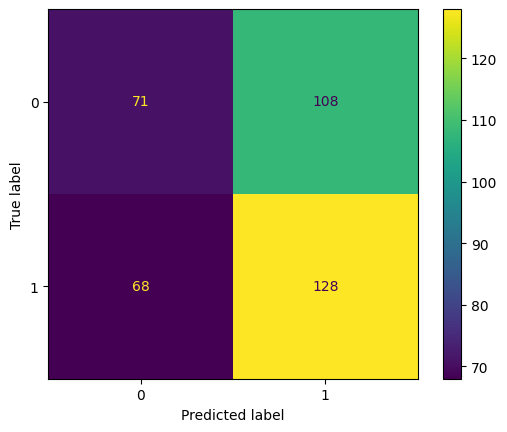

In [107]:
#NB con mejora de hiperparametros con grilla
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

alpha_range = np.logspace(-10,10,100)

nb_grid=BernoulliNB()

param_grid= dict(alpha=alpha_range)

grid_nb = GridSearchCV(nb_grid,param_grid,cv=5)

grid_nb.fit(x_train,y_train)

print("Mejores hiperparametros ", grid_nb.best_params_)

y_pred_grid_nb=grid_nb.predict(x_test)

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_grid_nb,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_grid_nb),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_grid_nb),4))
cfd.plot()
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación modelo regresión logística 

Recall : = 0.648
Accuracy : = 0.5413


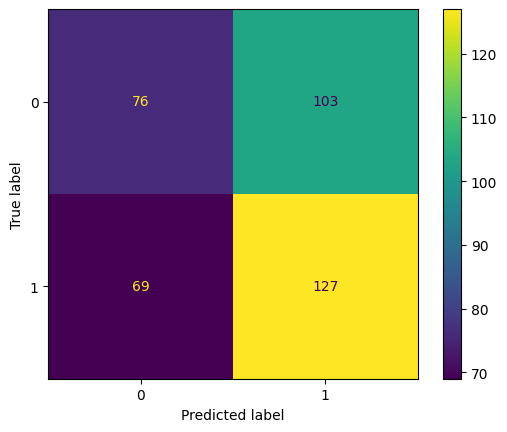

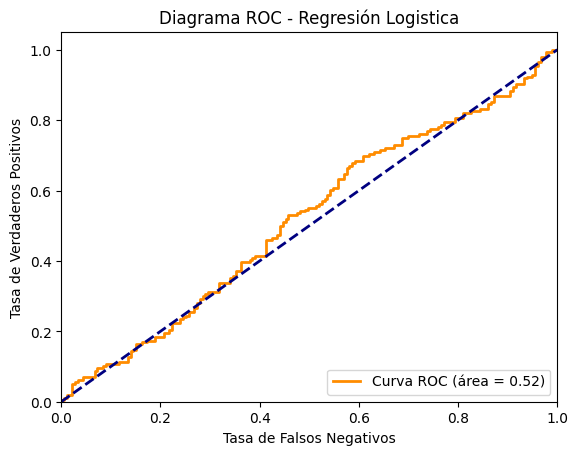

In [108]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

log.fit(x_train,y_train)
y_pred_log= log.predict(x_test)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,accuracy_score,roc_curve,auc

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_log,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_log),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_log),4))
cfd.plot()
plt.show()

#|||||||||||||||||||||||||||||||||||||||||||||||||||

y_score = log.predict_proba(x_test)[:,1]

fpr,tpr,punto_corte = roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)

plt.figure()

plt.plot(fpr,tpr, color = "darkorange", lw=2, label="Curva ROC (área = %0.2f)" % roc_auc)

plt.plot([0,1], [0,1], color = "navy", lw=2, linestyle= "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Tasa de Falsos Negativos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Diagrama ROC - Regresión Logistica")
plt.legend(loc="lower right")
plt.show()



Mejores hiperparametros  {'C': 0.004328761281083062, 'penalty': 'l2'}
Recall : = 0.7347
Accuracy : = 0.5333


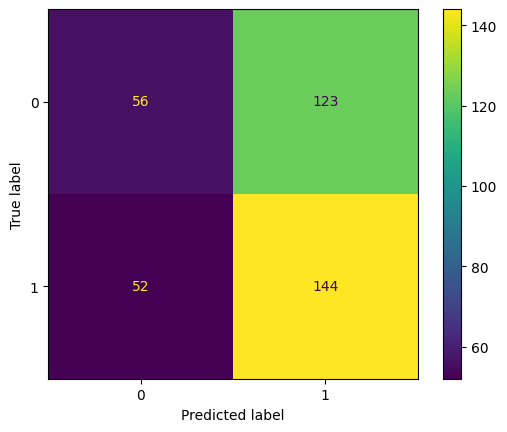

In [109]:
#Logistica con mejora de hiperparametros con grilla
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

C_range = np.logspace(-6,6,100)
penalty_options = ["l1","l2"]

log_grid=LogisticRegression()

param_grid= dict(C=C_range, penalty=penalty_options)

grid_log = GridSearchCV(log_grid,param_grid,cv=5)

grid_log.fit(x_train,y_train)

print("Mejores hiperparametros ", grid_log.best_params_)

y_pred_grid_log=grid_log.predict(x_test)

cfd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred_grid_log,labels=[0,1]))
print("Recall : =",round(recall_score(y_test,y_pred_grid_log),4))
print("Accuracy : =",round(accuracy_score(y_test,y_pred_grid_log),4))
cfd.plot()
plt.show()
